## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [3]:
# prerequisite package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_bivariate import *

## About the Dataset
In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [4]:
df = pd.read_csv('../Data/fuel-econ.csv')
df.shape

(3929, 20)

In [5]:
df.head(4)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


### Exercise 1: Scatterplots
Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**
1. What is the general relationship between these variables? 
2. Are there any points that appear unusual against these trends?
3. (Optional) Plot a dotted, red, diagonal line from the lower right to upper left of the plot for comparison.

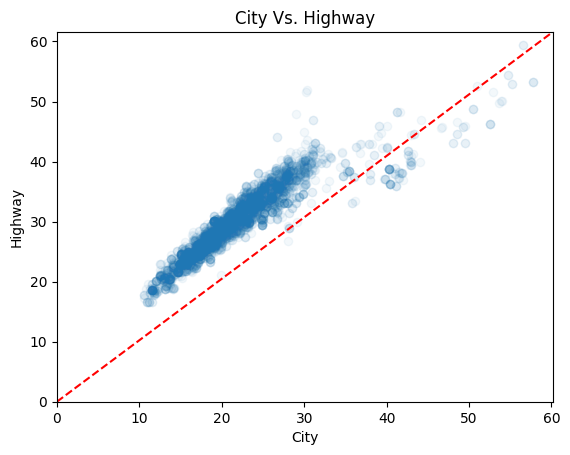

In [6]:
# YOUR CODE HERE
plt.scatter(data = df, x = 'city', y='highway', alpha=(1/20) )
plt.xlim(0)
plt.ylim(0)
plt.title('City Vs. Highway')
plt.xlabel('City')
plt.ylabel('Highway')

plt.plot([0, df['city'].max() + 10],
         [0, df['highway'].max() + 10],
         'r--');

> the general relationship between these variables is a positive correlation, when the city is higher the highway is higher too.

> There are no points that appear unusual against these trends, but some points are lower.

### Expected Output: Exercise #1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**


    1. The relationship is appears fairly linear until util about 30mpg. But some ultra-efficient cars
    tend to be much more efficient in cities. This might be worth investigating.
    
    2. There are some points that seem in-between the two trends discussed above.
    
    3. We could also plot two lines, and try to capture both trends.
    


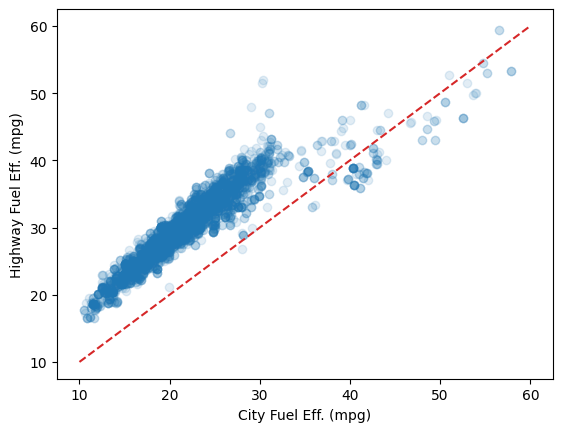

In [7]:
scatterplot_solution()

### Exercise 2: Heat map
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map (2d hist) to depict the data.** How strong is this trend?

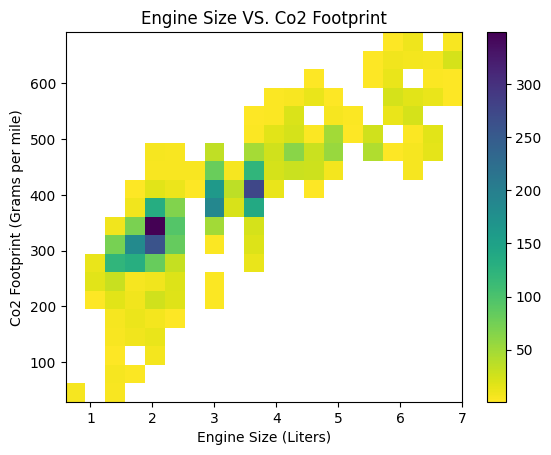

In [8]:
# YOUR CODE HERE
plt.hist2d(data = df, x ='displ', y = 'co2', bins=20, cmin=0.5, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Co2 Footprint (Grams per mile)')
plt.title('Engine Size VS. Co2 Footprint');

### Expected Output: Exercise #2


    The expelled co2 clearly depends engine size, but in a non-linear fashion. There are notably fewer
    entries in the extreme bins, however, compared to smaller engines.

    


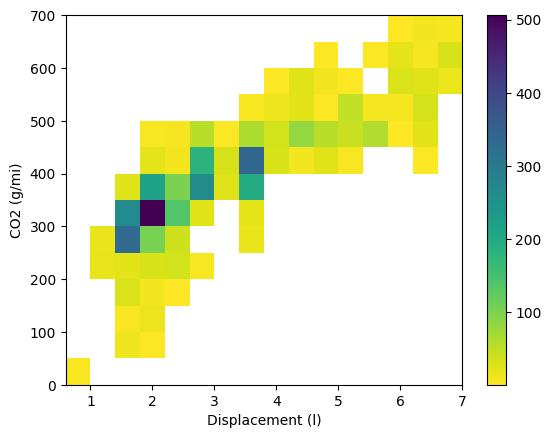

In [9]:
heatmap_solution()

### Exercise 3: Box plot
Use a box plot to explore the relationship between the fuel type and the engine size.  Fuel type classes can be found in the `VClass` column, while the engine sizes are in the `displ` column (in liters). Make sure to properly order your fuel classes (for example, plot from regular to premium gasoline, or vice-versa).

In [10]:
print(list(df['fuelType'].unique()))
ordered = ['Premium Gasoline' , 'Midgrade Gasoline', 'Regular Gasoline' , 'Diesel', 'Natural Gas']
print(ordered)

fuelTypes = pd.CategoricalDtype(ordered = True, categories = ordered)

df['fuelType'] = df['fuelType'].astype(fuelTypes)
df.info()

['Premium Gasoline', 'Regular Gasoline', 'Diesel', 'Midgrade Gasoline', 'Natural Gas']
['Premium Gasoline', 'Midgrade Gasoline', 'Regular Gasoline', 'Diesel', 'Natural Gas']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         3929 non-null   int64   
 1   make       3929 non-null   object  
 2   model      3929 non-null   object  
 3   year       3929 non-null   int64   
 4   VClass     3929 non-null   object  
 5   drive      3929 non-null   object  
 6   trans      3929 non-null   object  
 7   fuelType   3929 non-null   category
 8   cylinders  3929 non-null   int64   
 9   displ      3929 non-null   float64 
 10  pv2        3929 non-null   int64   
 11  pv4        3929 non-null   int64   
 12  city       3929 non-null   float64 
 13  UCity      3929 non-null   float64 
 14  highway    3929 non-null   float64 
 15  UHighway   3929 n

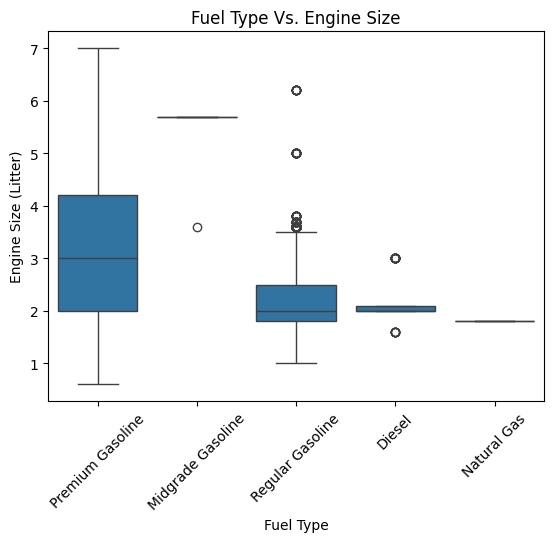

In [11]:
# YOUR CODE HERE
sns.boxplot(data = df, x= 'fuelType', y = 'displ', color='tab:blue')
plt.xticks(rotation=45)
plt.xlabel('Fuel Type')
plt.ylabel('Engine Size (Litter)')
plt.title('Fuel Type Vs. Engine Size');

### Expected output


    Note here we have a larger variation Premium and Regular gasoline vehicles. It's likely these are
    the most prominent classes. There are very few for the other grades, so we can't draw any
    conclusions for them.

    


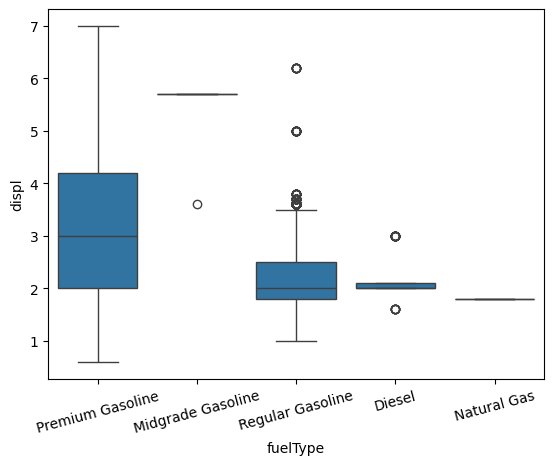

In [12]:
boxplot_solution()

### Exercise 4: Violin plot
Use a violin plot to explore the relationship between the drive type and highway performance. Drive type includes "all-wheel drive", "manual", etc. Drive type can be found in the `drive` column, while highway efficiency in `highway`.

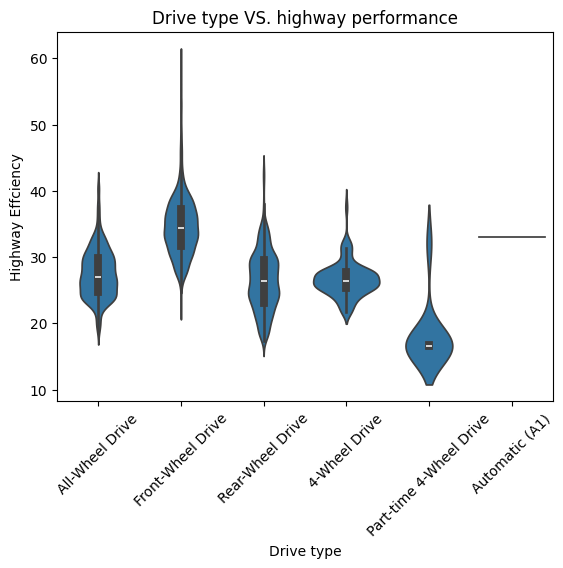

In [13]:
# YOUR CODE HERE
sns.violinplot(data= df, x= 'drive', y='highway')
plt.xticks(rotation=45)
plt.xlabel('Drive type')
plt.ylabel('Highway Effciency')
plt.title('Drive type VS. highway performance');

### Expected output


    We should probably drop the Automatic (A1) class, as there is only one entry. Otherwise, we see
    All-Wheel, Front-Wheel, and Rear Wheel drive appear fairly unimodel. 4-Wheel Drive and Part-time
    4-Wheel appear more bimodal, and much less efficient.

    On average, front-wheel drive appears the most efficient.
    


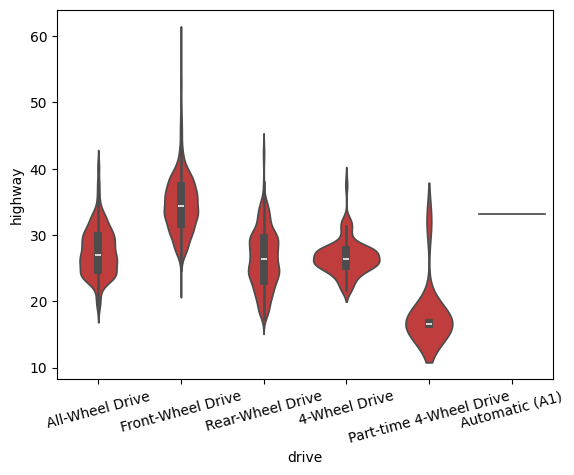

In [14]:
violin_solution()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solution_bivariate.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!